## Important: Run this code cell each time you start a new session!

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install os
!pip install wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import wfdb

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.4 MB/s eta 0:00:00


In [2]:
!wget -nc https://archive.physionet.org/users/shared/challenge-2019/training_setA.zip
!unzip -n training_setA.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/p015337.psv    
  inflating: training/p015338.psv    
  inflating: training/p015339.psv    
  inflating: training/p015340.psv    
  inflating: training/p015341.psv    
  inflating: training/p015342.psv    
  inflating: training/p015343.psv    
  inflating: training/p015344.psv    
  inflating: training/p015345.psv    
  inflating: training/p015346.psv    
  inflating: training/p015347.psv    
  inflating: training/p015348.psv    
  inflating: training/p015349.psv    
  inflating: training/p015350.psv    
  inflating: training/p015351.psv    
  inflating: training/p015352.psv    
  inflating: training/p015353.psv    
  inflating: training/p015354.psv    
  inflating: training/p015355.psv    
  inflating: training/p015356.psv    
  inflating: training/p015357.psv    
  inflating: training/p015358.psv    
  inflating: training/p015359.psv    
  inflating: training/p015360.psv    
  inflating: training/p015361.psv    

In [3]:
def load_single_file(file_path):
    df = pd.read_csv(file_path, sep="|")
    df['PatientID'] = file_path.split(os.sep)[-1][:-4]
    df['Hour'] = df.index
    keep_cols = ['PatientID', 'Age', 'Gender', 'SepsisLabel', 'Hour',
                 'HR', 'O2Sat', 'SBP', 'DBP', 'Resp']
    df = df[keep_cols]
    df.rename(columns={'Gender': 'Sex', 'SepsisLabel': 'HasSepsis'}, inplace=True)
    return df

def create_final_table():
    final_df = pd.DataFrame()
    patient_list = range(1, 11)
    patient_list = [f'p{str(s).zfill(6)}.psv' for s in patient_list]
    for f in patient_list:
        df = load_single_file(os.path.join("training", f))
        final_df = pd.concat([final_df, df])
    final_df.to_csv('sepsis.csv',index=False)
create_final_table()

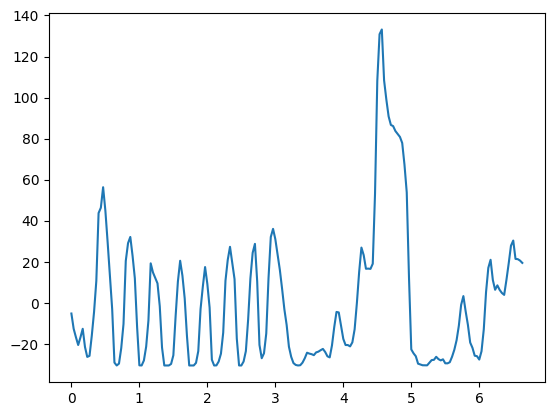

In [4]:
# Load the PPG data
user = '100004'
signals, fields = wfdb.rdsamp(f'{user}_PPG', pn_dir=f'butppg/{user}')
ppg = signals.flatten()
ppg = ppg[:200]
ppg -= ppg.mean()
fs = fields['fs']
ppg_time = np.arange(len(ppg))/fs

# Save it in a DataFrame
df = pd.DataFrame()
df['Time'] = ppg_time
df['PPG'] = ppg
df.to_csv('ppg.csv', index=False)

plt.figure()
plt.plot(df['Time'], df['PPG'])
plt.show()

# Instructions

To get full credit for this assignment, we should be able to run your entire notbook from start to finish without any errors. You can check this yourself by selecting "Runtime" > "Run all" in the Google Colab menu.

# Exercise 1: Visualizing Tabular Data

This exercise will involve the sepsis dataset we used in class.

In [5]:
df = pd.read_csv("sepsis.csv")
df

,PatientID,Age,Sex,HasSepsis,Hour,HR,O2Sat,SBP,DBP,Resp
0,p000001,83.14,0,0,0,NaN,NaN,NaN,NaN,NaN
1,p000001,83.14,0,0,1,97.0,95.0,98.0,NaN,19.0
2,p000001,83.14,0,0,2,89.0,99.0,122.0,NaN,22.0
3,p000001,83.14,0,0,3,90.0,95.0,NaN,NaN,30.0
4,p000001,83.14,0,0,4,103.0,88.5,122.0,NaN,24.5
...,...,...,...,...,...,...,...,...,...,...
580,p000010,76.71,0,0,18,82.0,96.0,109.0,50.0,20.0
581,p000010,76.71,0,0,19,79.0,94.0,97.0,49.0,21.0
582,p000010,76.71,0,0,20,79.0,90.0,117.0,54.0,19.0
583,p000010,76.71,0,0,21,84.0,91.0,124.0,59.0,23.0


**(Part 1)** Create a line graph that shows the oxygen saturation data (`O2Sat`) for patients `p000008`, `p000009`, and `p000010` over time. Your plot should be clearly legible and properly labeled with axis labels, a title, and a legend.

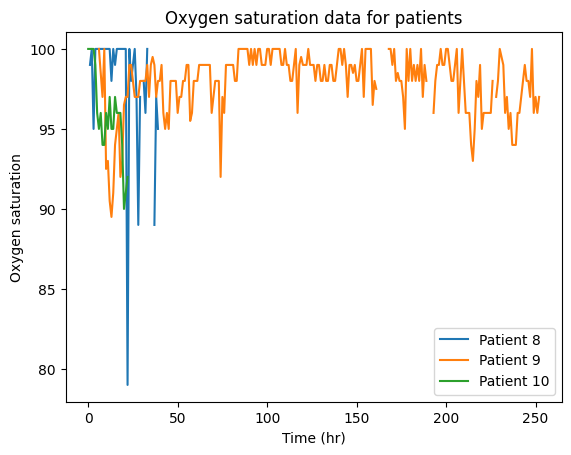

In [6]:
p8 = df[df['PatientID'] == 'p000008']
p9 = df[df['PatientID'] == 'p000009']
p10 = df[df['PatientID'] == 'p000010']

plt.figure()
plt.plot(p8['Hour'], p8['O2Sat'], label='Patient 8')
plt.plot(p9['Hour'], p9['O2Sat'], label='Patient 9')
plt.plot(p10['Hour'], p10['O2Sat'], label='Patient 10')
plt.title('Oxygen saturation data for patients')
plt.xlabel('Time (hr)')
plt.ylabel('Oxygen saturation')
plt.legend()
plt.show()

**(Part 2)** Create a bar graph that shows the number of hours during which each patient's oxygen saturation (`O2Sat`) went below 95. Some patients do not have data from this particular sensor, so it is okay if they are excluded from your graph. Your plot should be clearly legible and properly labeled with axis labels and a title.

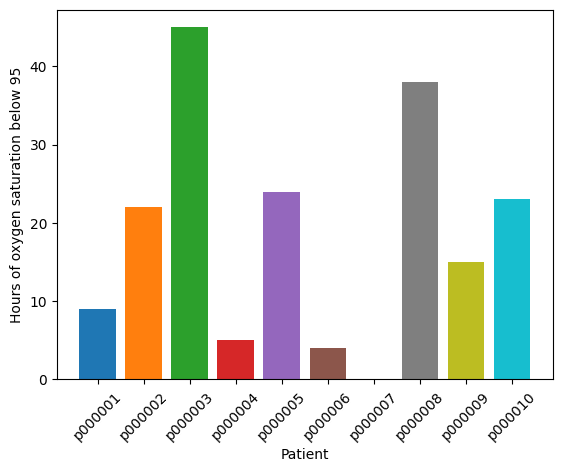

In [7]:
gp = df.groupby(by=['PatientID'])

plt.figure()
plt.xlabel('Patient')
plt.ylabel('Hours of oxygen saturation below 95')
for p, dfp in gp:
    plt.bar(p, (dfp['HR']<95).sum())
plt.xticks(rotation=45)
plt.show()

**(Part 3)** Create a bar graph that shows the split between male (`0`) and female (`1`) patients in the dataset. Remember that there are multiple entries per patient in this table. Your graph should not reflect the number of rows in the `DataFrame`, but rather the number of unique patients in the dataset. Your plot should be clearly legible and properly labeled with axis labels and a title.

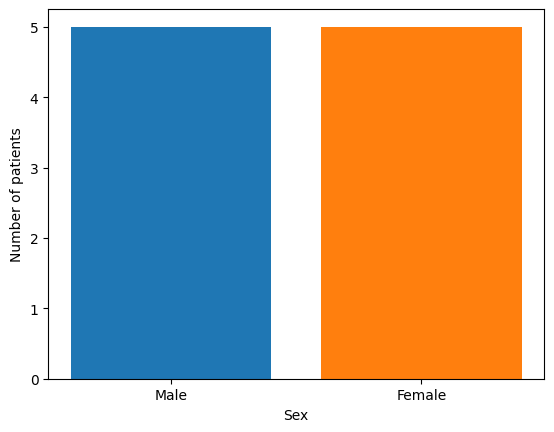

In [8]:
m, f = 0, 0
for p, dfp in gp:
  if dfp['Sex'].all()==0:
    m += 1
  else:
    f +=1
plt.figure()
plt.xlabel('Sex')
plt.ylabel('Number of patients')
plt.bar('Male', m)
plt.bar('Female', f)
plt.show()

# Exercise 2: Working with PPG Data

This exercise will involve real-world data that was collected from a photoplethysmography (PPG) sensor. In short, this type of sensor relies on optically measuring the amount of blood that flows in and out of a peripheral site like a fingertip to capture the cardiac waveform.

In [9]:
df = pd.read_csv("ppg.csv")
df

,Time,PPG
0,0.000000,-5.088518
1,0.033333,-12.501646
2,0.066667,-16.617164
3,0.100000,-20.412686
4,0.133333,-16.688403
...,...,...
195,6.500000,30.430563
196,6.533333,21.500355
197,6.566667,21.367937
198,6.600000,20.677867


**(Part 1)** Create a line graph that shows the PPG data over time. Your plot should be clearly legible and properly labeled with axis labels and a title.

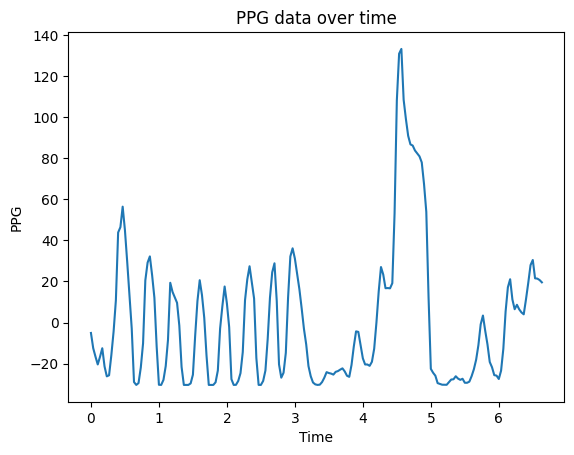

In [10]:
plt.figure()
plt.plot(df['Time'], df['PPG'])
plt.title('PPG data over time')
plt.xlabel('Time')
plt.ylabel('PPG')
plt.show()

Notice that the first half of the signal looks like a consistent heartbeat, while the second half of the signal looks less consistent. This is likely because the patient moved their fingertip or the sensor during this recording.

**(Part 2)** Write code that will calculate the sampling rate of this signal.

In [17]:
f = 1/np.mean(np.diff(df['Time']))
f

30.0

**(Part 3)** Write code that uses a 0.5-second sliding window with 0% overlap to automatically identify when the PPG signal quality is high. You can use whatever metric(s) and thresholds you deem fit to define signal quality. This code should print out the start and end time of each window when the signal quality is high.

In [12]:
x_values, y_values, width, stride = df['Time'], df['PPG'], 0.5, 0.5
# x_values: the time component of the signal
# y_values: the measured value of the signal
# width: the width of the windows measured in # of samples
# stride: the stride of the windows measured in # of samples

# Convert width and stride from time units to sample units
sampling_rate = 1 / np.mean(np.diff(x_values))  # Calculate the sampling rate from the time values
width_samples = int(width * sampling_rate)
stride_samples = int(stride * sampling_rate)

# Initialize the start and end of the window
start_idx = 0
end_idx = width_samples

# Stop generating windows when the window would go past the end of the signal
signal_length = len(x_values)
while end_idx <= signal_length:
    # Grab the current window
    x_window = x_values.iloc[start_idx:end_idx]
    y_window = y_values.iloc[start_idx:end_idx]

    # Calculate signal quality metric (e.g., standard deviation)
    quality_metric = np.std(y_window)

    # Define threshold for high-quality signal
    threshold = 15  # Example threshold, adjust as needed
    if quality_metric > threshold:
        print(f"High-quality window from {x_window.iloc[0]} to {x_window.iloc[-1]}")
    else:
        print(f"Low-quality window from {x_window.iloc[0]} to {x_window.iloc[-1]}")

    # Move the window over by a stride
    start_idx += stride_samples
    end_idx += stride_samples

High-quality window from 0.0 to 0.4666666666666667
High-quality window from 0.5 to 0.9666666666666668
High-quality window from 1.0 to 1.4666666666666666
High-quality window from 1.5 to 1.9666666666666663
High-quality window from 2.0 to 2.466666666666667
High-quality window from 2.5 to 2.966666666666667
High-quality window from 3.0 to 3.466666666666667
Low-quality window from 3.5 to 3.966666666666667
High-quality window from 4.0 to 4.466666666666667
High-quality window from 4.5 to 4.966666666666667
Low-quality window from 5.0 to 5.466666666666667
Low-quality window from 5.5 to 5.966666666666667
High-quality window from 6.0 to 6.466666666666667


**(Part 4)** Pick the largest contiguous chunk of the PPG signal where the signal quality is high. Then, write code that will use a sliding window of your choosing to count the number of heartbeats in that part of the data.

1
12


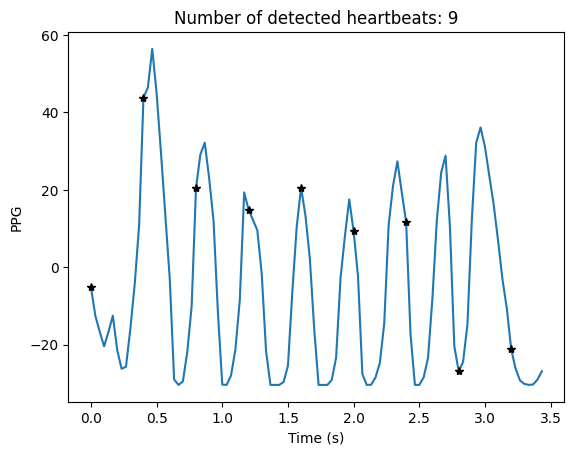

In [92]:
good_ppg = df.iloc[0:df['Time'].eq(3.466666666666667).idxmax()]

x_values, y_values = good_ppg['Time'], good_ppg['PPG']
sampling_rate = 1 / np.mean(np.diff(x_values))  # Calculate the sampling rate from the time values
width_samples = int(0.045 * sampling_rate)
stride_samples = int(0.4 * sampling_rate)
print(width_samples)
print(stride_samples)

# Initialize the start and end of the window
start_idx = 0
end_idx = width_samples
middle_idx = width_samples // 2  # Middle index should be based on width_samples

# Initialize step counter
hb = {}

# Stop generating windows when the window would go past the end of the signal
signal_length = len(x_values)
while end_idx <= signal_length:
    # Grab the current window
    x_window = x_values.iloc[start_idx:end_idx]
    y_window = y_values.iloc[start_idx:end_idx]

    # Check if there is a peak in the middle
    if y_window.argmax() == middle_idx:
        # Update the contents of the step counter
        hb_timestamp = x_window.values[middle_idx]
        hb_value = y_window.values[middle_idx]
        hb[hb_timestamp] = hb_value

    # Move the window over by a stride
    start_idx += stride_samples
    end_idx += stride_samples

# Show the steps overlaid on the graph
plt.figure()
plt.plot(good_ppg['Time'], good_ppg['PPG'])
plt.plot(hb.keys(), hb.values(), 'k*')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title(f'Number of detected heartbeats: {len(hb)}')
plt.show()